In [ ]:
import tensorflow.keras
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
from keras import optimizers
from keras.layers import Input, Lambda, Dense, Flatten, Dropout
from keras.models import Model
from tensorflow.keras.applications import EfficientNetB0
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras import metrics
from glob import glob
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn import metrics
import os
from imutils import paths
from cv2 import imread
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 3.5 MB/s eta 0:00:00


In [ ]:
pip install plot_keras_history

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.5/322.5 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for plot_keras_history: filename=plot_keras_history-1.1.38-py3-none-any.whl size=9455 sha256=aea35b082fdd035a94bd9bddb9b025cdd7afca2c27e7f96b36f3db0a59390774
  Stored in directory: /root/.cache/pip/wheels/2f/31/6c/bbc9703b7baa8bd3802a8aedd9e2f9e66941b0cf0d456ab4cc
  Created wheel for sanitize_ml_labels: filename=sanitize_ml_labels-1.0.51-py3-none-any.whl size=321865 sha256=19e526c4d2a0883b482d4287056a02eea392cd1614872c425ac980f39042171f
  Stored in directory: /root/.cache/pip/wheels/30/9f/f5/37d037c39ac8b305590d5956f7021c6ca94b63c68be24f6841
  Created wheel for support_developer: filename=support_developer-1.0.5-py3-none-any.whl size=5630 sha256=51768554631787db2823eac3f4a5fe296dcd83a6e17aa2a8ed8c9f42c0a818af
  Stored in directo

In [ ]:
from plot_keras_history import show_history, plot_history


In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import glob
import tensorflow as tf
from sklearn import preprocessing



train_images = []
train_labels = []

test_images = []
test_labels = []

val_images = []

for directory_path in glob.glob("/content/drive/My Drive/datasets/ischaemia_12000agusplit/train/*"):
    label = os.path.split(directory_path)
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        image=tf.keras.preprocessing.image.load_img(img_path, color_mode='rgb',
        target_size= (224,224))
        image=np.array(image)
        train_images.append(image)
        train_labels.append(label)

for directory_path1 in glob.glob("/content/drive/My Drive/datasets/ischaemia_12000agusplit/test/*"):
    label1 = os.path.split(directory_path1)
    print(label1)
    for img_path1 in glob.glob(os.path.join(directory_path1, "*.jpg")):
        print(img_path1)
        image1=tf.keras.preprocessing.image.load_img(img_path1, color_mode='rgb',
        target_size= (224,224))
        image1=np.array(image1)
        test_images.append(image1)
        test_labels.append(label1)

for directory_path in glob.glob("/content/drive/My Drive/datasets/ischaemia_12000agusplit/val/*"):
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        image=tf.keras.preprocessing.image.load_img(img_path, color_mode='rgb',
        target_size= (224,224))
        image=np.array(image)
        val_images.append(image)



train_images = np.array(train_images)
train_labels = np.array(train_labels)


test_images = np.array(test_images)
test_labels = np.array(test_labels)

val_images = np.array(val_images)

print(test_labels.shape)
print(train_labels.shape)

print(train_images.shape)
print(test_images.shape)
print(val_images.shape)


Streaming output truncated to the last 5000 lines.
/content/drive/My Drive/datasets/ischaemia_12000agusplit/train/Aug-Positive/_3340_5024657.jpg
/content/drive/My Drive/datasets/ischaemia_12000agusplit/train/Aug-Positive/_2270_5201747.jpg
/content/drive/My Drive/datasets/ischaemia_12000agusplit/train/Aug-Positive/_3533_2553946.jpg
/content/drive/My Drive/datasets/ischaemia_12000agusplit/train/Aug-Positive/_2519_9810348.jpg
/content/drive/My Drive/datasets/ischaemia_12000agusplit/train/Aug-Positive/_2390_9687662.jpg
/content/drive/My Drive/datasets/ischaemia_12000agusplit/train/Aug-Positive/_2521_9134937.jpg
/content/drive/My Drive/datasets/ischaemia_12000agusplit/train/Aug-Positive/_2669_8067748.jpg
/content/drive/My Drive/datasets/ischaemia_12000agusplit/train/Aug-Positive/_1947_5702428.jpg
/content/drive/My Drive/datasets/ischaemia_12000agusplit/train/Aug-Positive/_3622_3627558.jpg
/content/drive/My Drive/datasets/ischaemia_12000agusplit/train/Aug-Positive/_2858_1574710.jpg
/content/

In [ ]:
from tensorflow.keras.applications import EfficientNetB0

EfficientNetB0 = EfficientNetB0(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


16705208/16705208 [==============================] - 2s 0us/step


In [ ]:
EfficientNetB0.input


<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [ ]:
for layer in EfficientNetB0.layers:
  layer.trainable = False

In [ ]:
from tensorflow.keras.layers import BatchNormalization

x = Flatten()(EfficientNetB0.output)
x = tf.keras.layers.Dropout(0.5)(x)
x=BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001)(x)
x = tf.keras.layers.Dropout(0.5)(x)
x=BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001)(x)
x=Dense(256, kernel_regularizer= tensorflow.keras.regularizers.l2(l= 0.016), activity_regularizer= tensorflow.keras.regularizers.l1(0.006),bias_regularizer= tensorflow.keras.regularizers.l1(0.006), activation= 'relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x=Dense(128, kernel_regularizer= tensorflow.keras.regularizers.l2(l= 0.016), activity_regularizer= tensorflow.keras.regularizers.l1(0.006),bias_regularizer= tensorflow.keras.regularizers.l1(0.006), activation= 'relu')(x)
x=Dropout(rate= 0.45, seed= 123)(x)
prediction = Dense(2,activation='sigmoid')(x)
model = Model(inputs=EfficientNetB0.input, outputs=prediction)

In [ ]:
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()

In [ ]:
train_set = train_datagen.flow_from_directory('/content/drive/My Drive/datasets/ischaemia_12000agusplit/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 8486 images belonging to 2 classes.


In [ ]:
# Create a generator for the test data without augmentation
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/datasets/ischaemia_12000agusplit/test',
                                                  target_size=(224, 224),
                                                  batch_size=32,
                                                  class_mode='categorical' )

Found 1214 images belonging to 2 classes.


In [ ]:
val_set = val_datagen.flow_from_directory('/content/drive/My Drive/datasets/ischaemia_12000agusplit/val',
                                                  target_size=(224, 224),
                                                  batch_size=32,
                                                  class_mode='categorical' )

Found 2424 images belonging to 2 classes.


In [ ]:
from keras.optimizers import Adamax
model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss',verbose=1, patience=20)

In [ ]:

import time

#starting time
start = time.time()

batch_size = 32
#batch_size = 64
#batch_size = 128
hist = model.fit(train_set, steps_per_epoch = train_set.samples//batch_size,
                 validation_data = val_set,validation_steps = val_set.samples//batch_size,
                 epochs = 100,callbacks=[es]
                 )
# end time
end = time.time()

# total time taken
print("Execution time of the program is- ", end-start)

Epoch 1/100
265/265 [==============================] - 60s 152ms/step - loss: 12.2441 - accuracy: 0.7718 - val_loss: 9.4835 - val_accuracy: 0.8917
Epoch 2/100
265/265 [==============================] - 31s 119ms/step - loss: 7.8136 - accuracy: 0.8547 - val_loss: 6.0643 - val_accuracy: 0.9025
Epoch 3/100
265/265 [==============================] - 33s 124ms/step - loss: 4.8976 - accuracy: 0.8782 - val_loss: 3.7797 - val_accuracy: 0.9175
Epoch 4/100
265/265 [==============================] - 35s 131ms/step - loss: 3.0778 - accuracy: 0.8931 - val_loss: 2.4160 - val_accuracy: 0.9287
Epoch 5/100
265/265 [==============================] - 32s 120ms/step - loss: 2.0516 - accuracy: 0.9031 - val_loss: 1.6888 - val_accuracy: 0.9358
Epoch 6/100
265/265 [==============================] - 32s 121ms/step - loss: 1.5221 - accuracy: 0.9135 - val_loss: 1.3169 - val_accuracy: 0.9346
Epoch 7/100
265/265 [==============================] - 33s 123ms/step - loss: 1.2516 - accuracy: 0.9229 - val_loss: 1.1472 

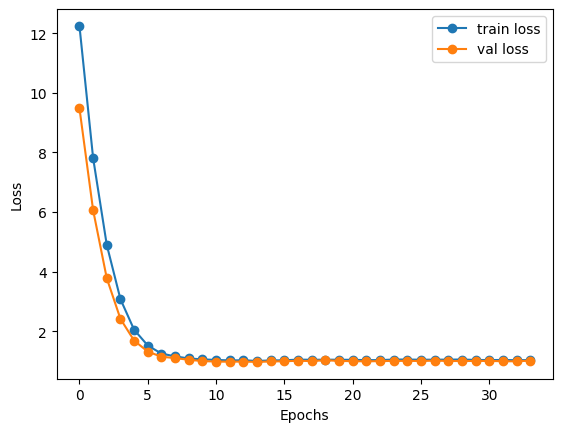

In [ ]:
# plot the loss
plt.plot(hist.history['loss'], label='train loss',marker='o')
plt.plot(hist.history['val_loss'], label='val loss',marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

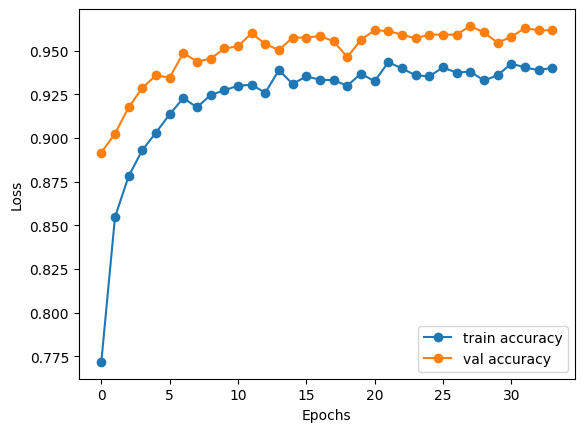

In [ ]:

# plot the loss
plt.plot(hist.history['accuracy'], label='train accuracy',marker='o')
plt.plot(hist.history['val_accuracy'], label='val accuracy',marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
train_labels = train_labels[:, 1]
test_labels = test_labels[:, 1]

In [ ]:

label_mapping = {'Aug-Negative': 0, 'Aug-Positive': 1}
train_labels = np.array([label_mapping[label] for label in train_labels])
test_labels = np.array([label_mapping[label] for label in test_labels])

In [ ]:
from sklearn import metrics

# Make predictions on the training data
train_pred_probs = model.predict(train_images)  # Use the original training data
train_pred_labels = np.argmax(train_pred_probs, axis=1)

# Make predictions on the test data
test_pred_probs = model.predict(test_images)
test_pred_labels = np.argmax(test_pred_probs, axis=1)

# Ensure that train_labels and test_labels are correctly shaped
# They should be one-dimensional arrays if not already
train_labels = np.squeeze(train_labels)
test_labels = np.squeeze(test_labels)

# Calculate the accuracy scores
train_accuracy = metrics.accuracy_score(train_labels, train_pred_labels)
test_accuracy = metrics.accuracy_score(test_labels, test_pred_labels)

print("\nTraining Accuracy Score:", train_accuracy * 100)
print("\nTesting Accuracy Score:", test_accuracy * 100)

38/38 [==============================] - 3s 79ms/step

Training Accuracy Score: 99.75253358472779

Testing Accuracy Score: 96.54036243822077


In [ ]:
feat_train=model.predict(train_images)
feat_train=feat_train.reshape(feat_train.shape[0], -1)

feat_test=model.predict(test_images)
feat_test=feat_test.reshape(feat_test.shape[0], -1)

38/38 [==============================] - 2s 59ms/step


In [ ]:
from sklearn.metrics import precision_score

from sklearn.metrics import recall_score

from sklearn.metrics import f1_score

from sklearn.metrics import cohen_kappa_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score





# accuracy: (tp + tn) / (p + n)

accuracy = accuracy_score(test_labels, test_pred_labels)

print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(test_labels, test_pred_labels)

print('Precision: %f' %precision)

# recall: tp / (tp + fn)

recall = recall_score(test_labels, test_pred_labels)

print('Recall: %f' % recall)


Specificity = recall_score(test_labels, test_pred_labels, pos_label= 0)

print('Specificity: %f' % Specificity)

# f1: 2 tp / (2 tp + fp + fn)

f1 = f1_score(test_labels, test_pred_labels)

print('F1 score: %f' % f1)

roc_auc = roc_auc_score(test_labels, test_pred_labels)

print('roc_auc: %f' % roc_auc)

from sklearn.metrics import matthews_corrcoef

mcc= matthews_corrcoef(test_labels, test_pred_labels)
print('mcc %f' % mcc)

Accuracy: 0.965404
Precision: 0.959350
Recall: 0.971993
Specificity: 0.958814
F1 score: 0.965630
roc_auc: 0.965404
mcc 0.930888


In [ ]:
labels = np.array(train_labels)
test_labels=np.array(test_labels)

In [ ]:
# importing libraries
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LinearRegression

In [ ]:
pip install lazypredict


In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(feat_train,feat_test,labels,test_labels)

print(models)

 97%|█████████▋| 28/29 [00:17<00:00,  1.66it/s]

[LightGBM] [Info] Number of positive: 4243, number of negative: 4243
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000392 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 8486, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

100%|██████████| 29/29 [00:17<00:00,  1.63it/s]


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RidgeClassifierCV                  0.97               0.97     0.97      0.97   
SVC   

In [ ]:
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
l = LogisticRegression(random_state=42)
l.fit(feat_train, labels)
# Create and train the SVM classifier


# Make predictions on the training and test data
predictedtrain = l.predict(feat_train)
predictedtest = l.predict(feat_test)

# Calculate and print the training and testing accuracy scores
train_accuracy = accuracy_score(labels, predictedtrain)
test_accuracy = accuracy_score(test_labels, predictedtest)

print("Training Accuracy Score:", train_accuracy* 100)
print("Testing Accuracy Score:", test_accuracy* 100)


accuracy = accuracy_score(test_labels, predictedtest)

print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(test_labels, predictedtest)

print('Precision: %f' %precision)

# recall: tp / (tp + fn)

recall = recall_score(test_labels, predictedtest)

print('Recall: %f' % recall)


Specificity = recall_score(test_labels, predictedtest, pos_label= 0)

print('Specificity: %f' % Specificity)

# f1: 2 tp / (2 tp + fp + fn)

f1 = f1_score(test_labels, predictedtest)

print('F1 score: %f' % f1)

roc_auc = roc_auc_score(test_labels, predictedtest)

print('roc_auc: %f' % roc_auc)

from sklearn.metrics import matthews_corrcoef

mcc= matthews_corrcoef(test_labels, predictedtest)
print('mcc %f' % mcc)

Training Accuracy Score: 99.69361300966297
Testing Accuracy Score: 96.78747940691927
Accuracy: 0.967875
Precision: 0.967105
Recall: 0.968699
Specificity: 0.967051
F1 score: 0.967901
roc_auc: 0.967875
mcc 0.935751
